<a href="https://colab.research.google.com/github/AmeerTechsoft/Data-science-project/blob/main/credit_card_fraud_detection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Preparing the data**

In [ ]:
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
transaction_df = pd.read_csv('./drive/MyDrive/datasets/creditcard.csv')        # Reading the credit card dataset
transaction_df.head()       # Show the first five entry in the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(transaction_df.columns)       # Printing the columns
transaction_df.describe()       # Summary statistics of the dataset

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# checking for empty cells

transaction_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'Count')

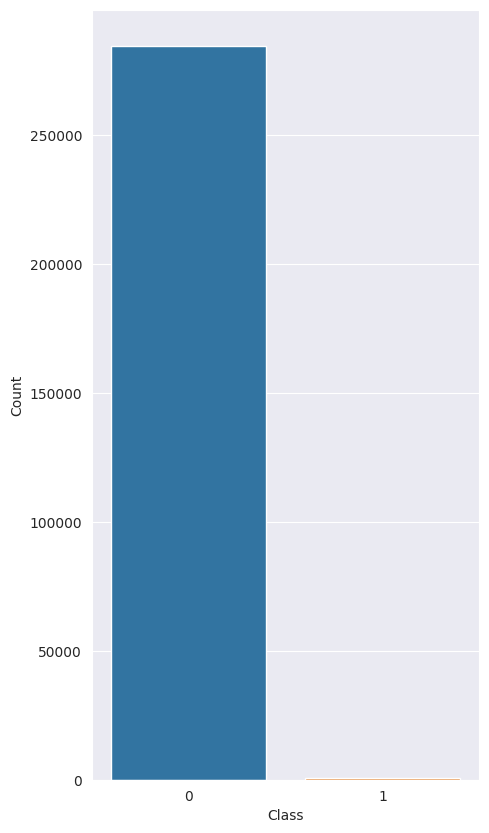

In [ ]:
# Visualizing the Class percentage
from pandas.core import groupby

class_per = transaction_df.groupby('Class').aggregate('count')
sns.set_style('darkgrid')
plt.figure(figsize=(5,10))
sns.barplot(x=class_per.index, y=class_per['Amount'])
plt.ylabel('Count')

In [ ]:
# Calculating the percentage of classes in the dataset
fradulent = transaction_df.Class[transaction_df['Class'] == 1]
non_fradulent = transaction_df.Class[transaction_df['Class'] == 0]

fraud_percent = (len(fradulent)/len(transaction_df)) * 100
non_fraud_percent = (len(non_fradulent)/len(transaction_df)) * 100

print(f'Percentage of fradulent transactions : {fraud_percent:.2f}%')
print(f'Percentage of non-fradulent transactions : {non_fraud_percent:.2f}%')

Percentage of fradulent transactions : 0.17%
Percentage of non-fradulent transactions : 99.83%


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
transaction_df['Amount'] = scaler.fit_transform(np.array(transaction_df['Amount']).reshape(-1,1))

In [ ]:
transaction_df = transaction_df.drop('Time',axis=1)

In [ ]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

<Axes: >

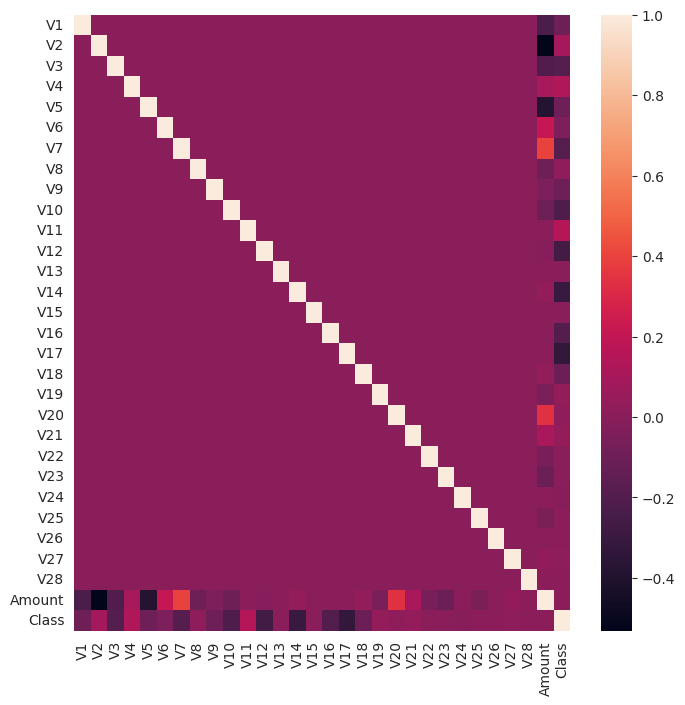

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(transaction_df.corr())


In [ ]:
transaction_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

We are taking 492 available samples of 'Class 1' and joining them with random 492 'Class 0' rows to create a balanced data set for modelling our classifier.

In [ ]:
X1 = transaction_df[transaction_df['Class'] == 1]
X2 = transaction_df[transaction_df['Class'] == 0].sample(492)
X = pd.concat([X1,X2],axis=0)
X = X.sample(frac=1).reset_index(drop=True)
y = X['Class']
X = X.drop('Class',axis=1)

In [ ]:
 print(f' Number of Fraudulent"1" and non-fraudulent"0" Transactions in dataframe \n {y.value_counts()}')
print(f'Total count of Transactions to be used for the training  \n {y.value_counts().sum()}')

 Number of Fraudulent"1" and non-fraudulent"0" Transactions in dataframe 
 1    492
0    492
Name: Class, dtype: int64
Total count of Transactions to be used for the training  
 984


<Axes: >

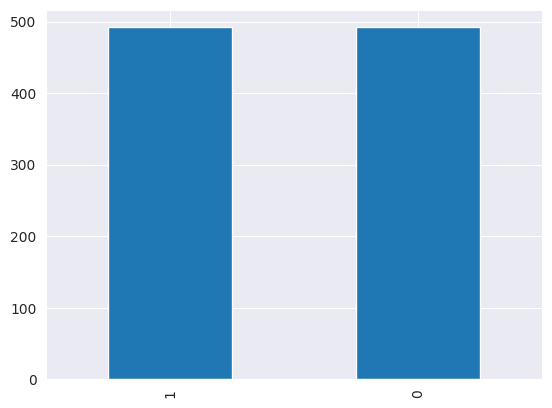

In [ ]:
y.value_counts().plot.bar()

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset to training data and test data (70% training, 30% testing)
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size=0.3)

print(f'Total size : {X.shape[0]}')
print(f'Training set size : {X_train.shape[0]}')
print(f'Test set size : {X_val.shape[0]}')

Total size : 984
Training set size : 688
Test set size : 296


### **2. Clustering the data using KMeans**

In [ ]:
# Defining KMeans model with k=2 meaning 2 classes for Fraudulent and Not-Fradulent transactions
kmeans = KMeans(n_clusters=2)

# fitting the KMeans model to the data
keans_cluster = kmeans.fit(X_train)

# Getting the cluster labels and center points of the data points


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


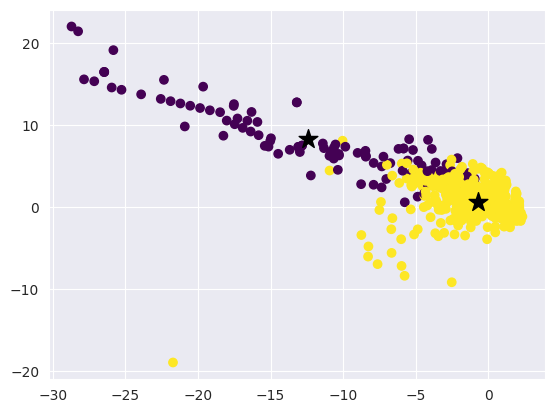

In [ ]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='*', c='black')
plt.show()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      984 non-null    float64
 1   V2      984 non-null    float64
 2   V3      984 non-null    float64
 3   V4      984 non-null    float64
 4   V5      984 non-null    float64
 5   V6      984 non-null    float64
 6   V7      984 non-null    float64
 7   V8      984 non-null    float64
 8   V9      984 non-null    float64
 9   V10     984 non-null    float64
 10  V11     984 non-null    float64
 11  V12     984 non-null    float64
 12  V13     984 non-null    float64
 13  V14     984 non-null    float64
 14  V15     984 non-null    float64
 15  V16     984 non-null    float64
 16  V17     984 non-null    float64
 17  V18     984 non-null    float64
 18  V19     984 non-null    float64
 19  V20     984 non-null    float64
 20  V21     984 non-null    float64
 21  V22     984 non-null    float64
 22  V2

In [ ]:
predictions = keans_cluster.predict(X_val)

pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y_val == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))

pred_good = np.where(predictions == 0)[0]
real_good = np.where(y_val == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_val) - (false_neg + false_pos)) / len(X_val)
print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(predictions))
print("False negatives, false positives, mispredictions:", false_neg, false_pos, false_neg + false_pos)
print("Total test data points:", len(X_val))

Accuracy: 0.3277027027027027
False negative rate (with respect to misclassifications):  0.27638190954773867
False negative rate (with respect to all the data):  0.1858108108108108
False negatives, false positives, mispredictions: 55 144 199
Total test data points: 296


### **3. Training the MLP model using Tensorflow**

In [ ]:
# Importing the tensorflow modules
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# Number of features/predictors
n_features = X_train.shape[1]
n_features

29

In [ ]:
# Building the MLP model
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[n_features]),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
# optimizing the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [ ]:
# Stop iteration after 10 epochs if the model performance doesn't improve
early_stopping = keras.callbacks.EarlyStopping(
    patience = 5,
    min_delta = 0.001,
    restore_best_weights=True,
)

In [ ]:
# Training the model and testing with the validation set
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size = 512,
    epochs = 100,
    callbacks=[early_stopping],
)

Epoch 1/100
2/2 [==============================] - 1s 223ms/step - loss: 0.5274 - binary_accuracy: 0.6017 - val_loss: 0.2946 - val_binary_accuracy: 0.9595
Epoch 2/100
2/2 [==============================] - 0s 65ms/step - loss: 0.3027 - binary_accuracy: 0.9331 - val_loss: 0.2042 - val_binary_accuracy: 0.9392
Epoch 3/100
2/2 [==============================] - 0s 49ms/step - loss: 0.2425 - binary_accuracy: 0.9201 - val_loss: 0.1609 - val_binary_accuracy: 0.9426
Epoch 4/100
2/2 [==============================] - 0s 47ms/step - loss: 0.2099 - binary_accuracy: 0.9273 - val_loss: 0.1323 - val_binary_accuracy: 0.9527
Epoch 5/100
2/2 [==============================] - 0s 48ms/step - loss: 0.1789 - binary_accuracy: 0.9331 - val_loss: 0.1152 - val_binary_accuracy: 0.9662
Epoch 6/100
2/2 [==============================] - 0s 49ms/step - loss: 0.1583 - binary_accuracy: 0.9375 - val_loss: 0.1076 - val_binary_accuracy: 0.9730
Epoch 7/100
2/2 [==============================] - 0s 52ms/step - loss: 0.1

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.527445,0.601744,0.294637,0.959459
1,0.302665,0.933140,0.204242,0.939189
2,0.242533,0.920058,0.160896,0.942568
3,0.209876,0.927326,0.132253,0.952703
4,0.178878,0.933140,0.115213,0.966216
5,0.158283,0.937500,0.107555,0.972973
6,0.149100,0.940407,0.103924,0.972973
7,0.142257,0.940407,0.101989,0.972973
8,0.132207,0.946221,0.103411,0.962838
9,0.124233,0.950581,0.106854,0.959459


Text(0.5, 1.0, 'Accuracy : 97.30')

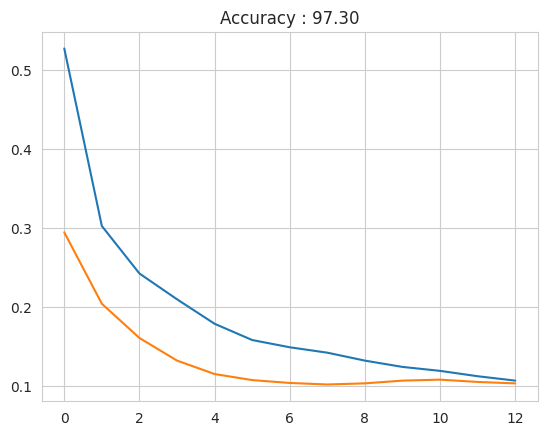

In [ ]:
accuracy = np.max(history_frame['val_binary_accuracy'])

history_frame['loss'].plot()
history_frame['val_loss'].plot()
plt.title(f'Accuracy : {accuracy*100:.2f}')

In [ ]:
y_pred = np.round(model.predict(X_val))
y_pred

10/10 [==============================] - 0s 2ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)

# Generate a confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_val,y_pred))
print('Classification Report:')
print(classification_report(y_val, y_pred))


Accuracy: 0.972972972972973
Confusion Matrix:
[[152   0]
 [  8 136]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       152
           1       1.00      0.94      0.97       144

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296



In [ ]:
import joblib

In [ ]:
joblib.dump(model, "mlp_model.pkl")

['mlp_model.pkl']

### **4. Training the HMM Model**

In [ ]:
!pip install -U hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
# coping the training data from the one created above
hmm_X_train = X_train
hmm_X_test = X_val

In [ ]:
from hmmlearn import hmm

In [ ]:
n_states = 2
n_samples, n_features = hmm_X_train.shape

learnedModel = hmm.GaussianHMM(n_components=n_states,
                               n_iter=10000,
                               tol=.01,
                               verbose=False,
                               algorithm='viterbi',

                               )
model = learnedModel.fit(hmm_X_train)


In [ ]:
hmm_pred = model.predict(hmm_X_test)
hmm_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Accuracy: 0.8885135135135135
Confusion Matrix:
[[142   4]
 [ 29 121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       146
           1       0.97      0.81      0.88       150

    accuracy                           0.89       296
   macro avg       0.90      0.89      0.89       296
weighted avg       0.90      0.89      0.89       296



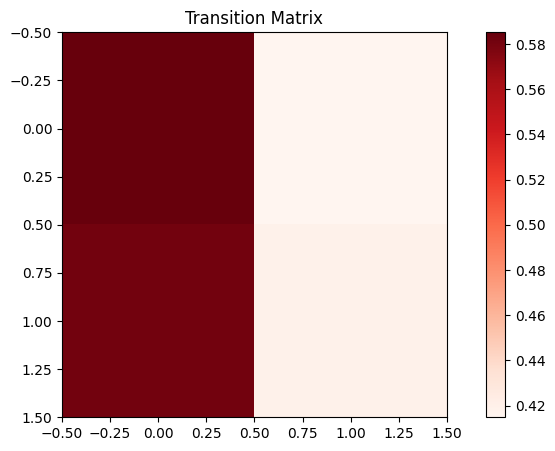

In [ ]:
accuracy = accuracy_score(y_val, hmm_pred)
print('Accuracy:', accuracy)

# Generate a confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_val,hmm_pred))
print('Classification Report:')
print(classification_report(y_val, hmm_pred))

# Plot the transition matrix of the HMM model
transmat = model.transmat_
plt.figure(figsize=(10, 5))
plt.imshow(transmat, cmap='Reds')
plt.colorbar()
plt.title('Transition Matrix')
plt.show()

In [ ]:
model.transmat_

array([[0.58518813, 0.41481187],
       [0.58109497, 0.41890503]])

In [ ]:
from sklearn.metrics import roc_auc_score


y_scores = model.predict_proba(hmm_X_test)[:, 1]  # get the probability scores for class 1

# Calculate AUC ROC
auc_roc = roc_auc_score(y_val, y_scores)

print("AUC ROC:", auc_roc)


AUC ROC: 0.9461643835616438


In [ ]:
import joblib

model = joblib.load("HMM_model.pkl")
